# Riskfolio-Lib Tutorial: 
<br><a href="https://www.kqzyfj.com/click-101360347-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button.png" height="40" />
</div>
<br>
</a>
<a href="https://www.paypal.com/ncp/payment/GN55W4UQ7VAMN" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button2.png" height="40" />
</div>
</a>

<br><a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 
<br>
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.linkedin.com/company/orenj-i)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
## Tutorial 23: Dollar Neutral Portfolios

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end, auto_adjust=False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6986%,1.7540%,-0.1730%,0.2410%,1.3734%,-1.0858%
2016-01-06,-11.4864%,-1.5879%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0156%,-0.7654%,-3.0048%,-0.9035%,-2.9144%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9770%,-1.2207%,-0.8856%,-4.6059%,-2.5394%,...,-2.2066%,-3.0310%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2844%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3838%,-0.1117%,-1.1387%,-0.9720%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0215%,0.0914%,-1.1791%,0.5674%,0.5288%,0.6617%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


## 2. Mean Risk Dollar Neutral Portfolios

To calculate dollar neutral portfolios we have to solve the following problem:

$$
\begin{aligned}
& \max_{w} & & \mu w \\
& & & \sum^{N}_{i=1} w_{i} = 0 \\
& & & \phi(w) \leq \overline{\phi} \\
& & & \sum^{N}_{i=1} \max(w_{i},0) \leq W^{L} \\
& & & \sum^{N}_{i=1} -\min(w_{i},0) \leq W^{S} \\
& & & W^{S} \leq w \leq W^{L}\\
\end{aligned}
$$

Where $\mu$ is the mean vector, $w$ are the portfolio weights, $\phi(w)$ is a convex risk function, $\overline{\phi}$ is an upper bound for the risk function, $W^{L}$ is the upper bound of positive weights and $W^{S}$ is the upper bound of negative weights.

## 3. Dollar Neutral Portfolio with a Constraint on Standard Deviation

### 3.1 Calculating Dollar Neutral Portfolio

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Market neutral constraints:

port.sht = True # Allows short positions
port.uppersht = 1 # Upper bound for negative weights
port.upperlng = 1 # Upper bound for positive weights
port.budget = 0 # Sum of all weights
port.budgetsht = 1 # Upper bound for sum of negative weights
port.upperdev = 0.20/252**0.5 # Upper bound for daily standard deviation

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman), FM (Factor Model)
                # or BL_FM (Black Litterman with Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MaxRet' # For Market Neutral the objective must be
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 3 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

print("Sum weights : ", np.round(np.sum(w.to_numpy()),4))
display(w.T)

Sum weights :  0.0


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,-25.2550%,11.0721%,0.0000%,-0.1778%,0.0000%,0.0000%,-0.0000%,3.3190%,0.0000%,-0.0000%,...,-0.0000%,0.0000%,-39.6170%,-23.0904%,-0.0000%,0.0000%,0.0000%,-3.3775%,-0.0000%,0.0000%


### 3.2 Plotting portfolio composition

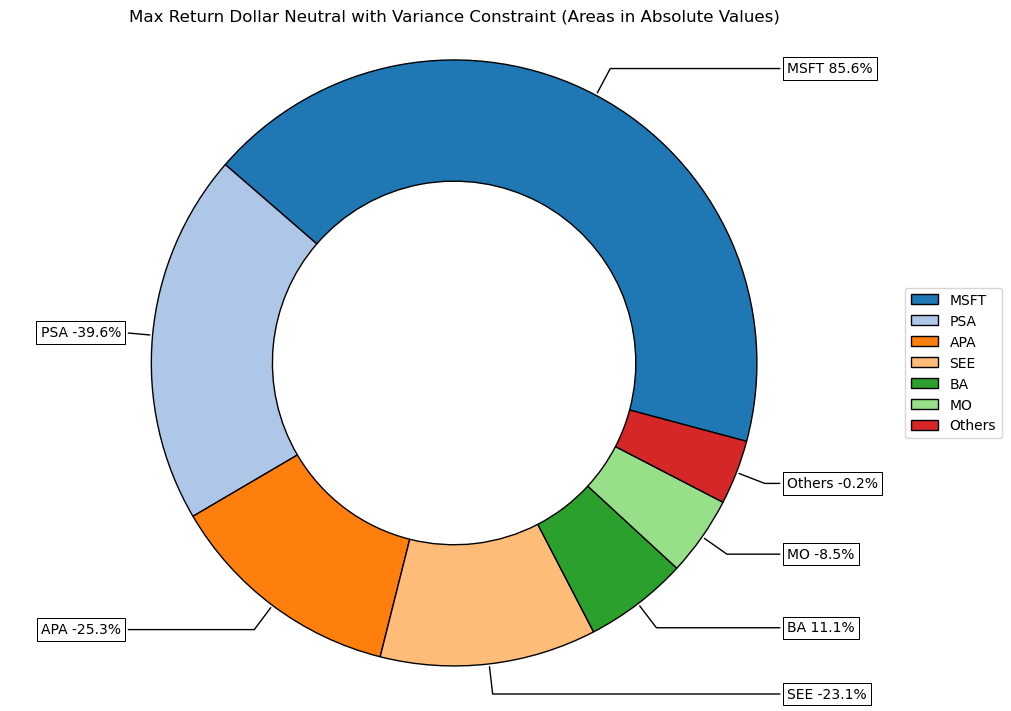

In [4]:
# Plotting the composition of the portfolio

title = "Max Return Dollar Neutral with Variance Constraint"
ax = rp.plot_pie(w=w,
                 title=title,
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=7,
                 width=10,
                 ax=None)

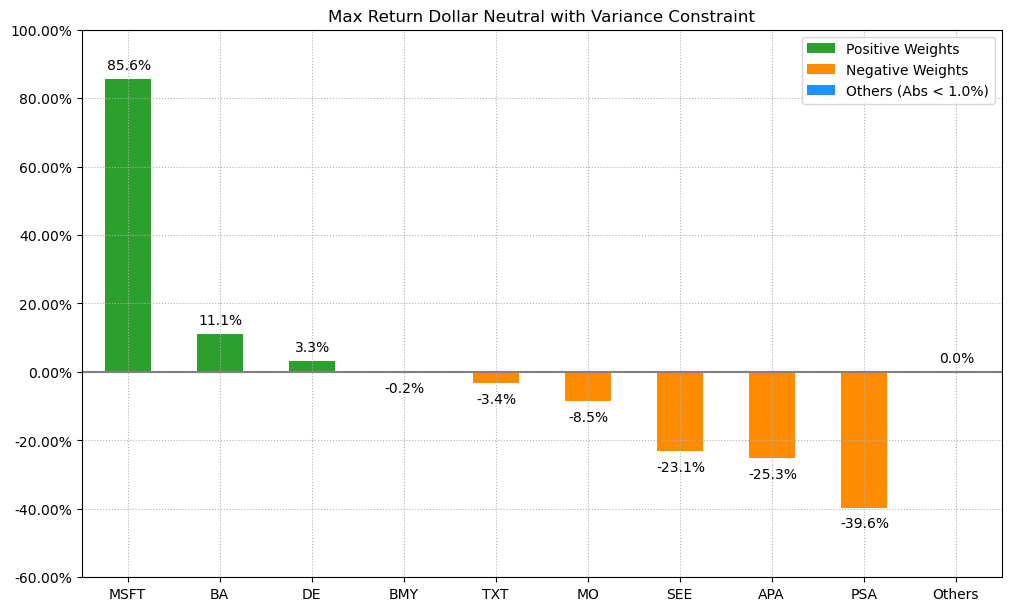

In [5]:
# Plotting the composition of the portfolio using bar chart

ax = rp.plot_bar(w,
                 title="Max Return Dollar Neutral with Variance Constraint",
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10)

### 3.3 Calculating efficient frontier

In [6]:
points = 50 # Number of points of the frontier
port.upperdev = None # Deleting the upper bound for daily standard deviation

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
APA,0.0000%,-0.7347%,-1.4693%,-2.2040%,-2.9386%,-3.6733%,-4.4079%,-5.1426%,-5.8772%,-6.6119%,...,-78.6982%,-81.2198%,-83.6916%,-86.1195%,-88.5087%,-90.8632%,-93.1868%,-95.4824%,-97.7527%,-100.0000%
BA,0.0000%,0.9976%,1.9953%,2.9929%,3.9906%,4.9882%,5.9859%,6.9835%,7.9812%,8.9788%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
BAX,0.0000%,0.7380%,1.4759%,2.2139%,2.9519%,3.6898%,4.4278%,5.1658%,5.9038%,6.6418%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
BMY,0.0000%,-1.0278%,-2.0557%,-3.0835%,-4.1113%,-5.1392%,-6.1670%,-7.1948%,-8.2227%,-9.2505%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%
CMCSA,0.0000%,-0.1123%,-0.2247%,-0.3370%,-0.4494%,-0.5617%,-0.6741%,-0.7864%,-0.8987%,-1.0112%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
CNP,0.0000%,0.9013%,1.8027%,2.7040%,3.6054%,4.5067%,5.4081%,6.3094%,7.2107%,8.1120%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%,0.0000%,0.0000%,-0.0000%,0.0000%
CPB,0.0000%,-0.2936%,-0.5871%,-0.8807%,-1.1742%,-1.4678%,-1.7613%,-2.0549%,-2.3484%,-2.6419%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%
DE,0.0000%,0.7301%,1.4602%,2.1903%,2.9204%,3.6505%,4.3806%,5.1107%,5.8409%,6.5710%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
HPQ,0.0000%,-0.1320%,-0.2639%,-0.3959%,-0.5279%,-0.6599%,-0.7918%,-0.9238%,-1.0558%,-1.1878%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
JCI,0.0000%,-0.2465%,-0.4929%,-0.7394%,-0.9859%,-1.2324%,-1.4789%,-1.7254%,-1.9718%,-2.2183%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%


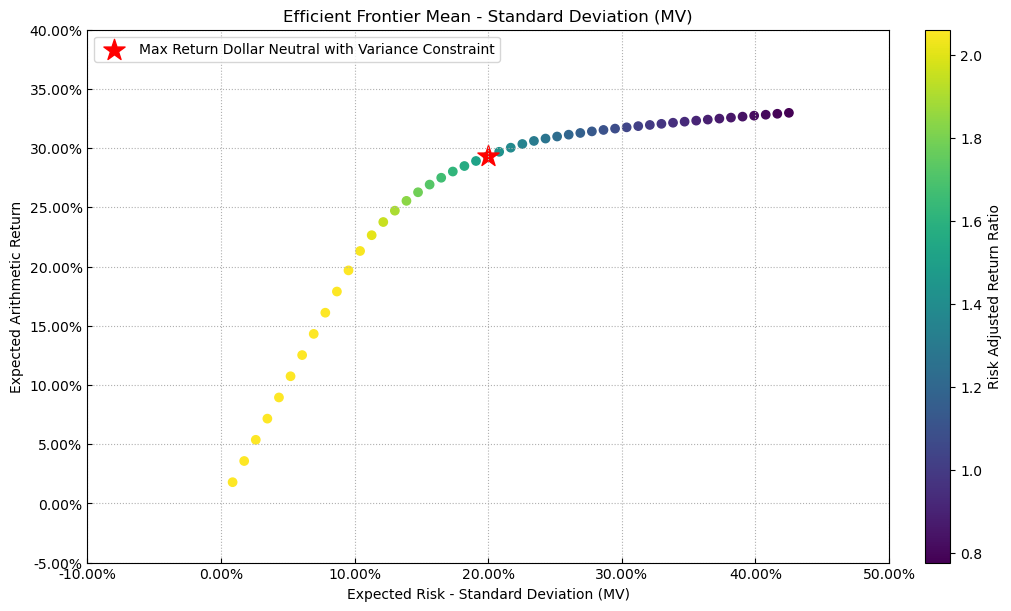

In [7]:
# Plotting the efficient frontier

label = "Max Return Dollar Neutral with Variance Constraint" # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

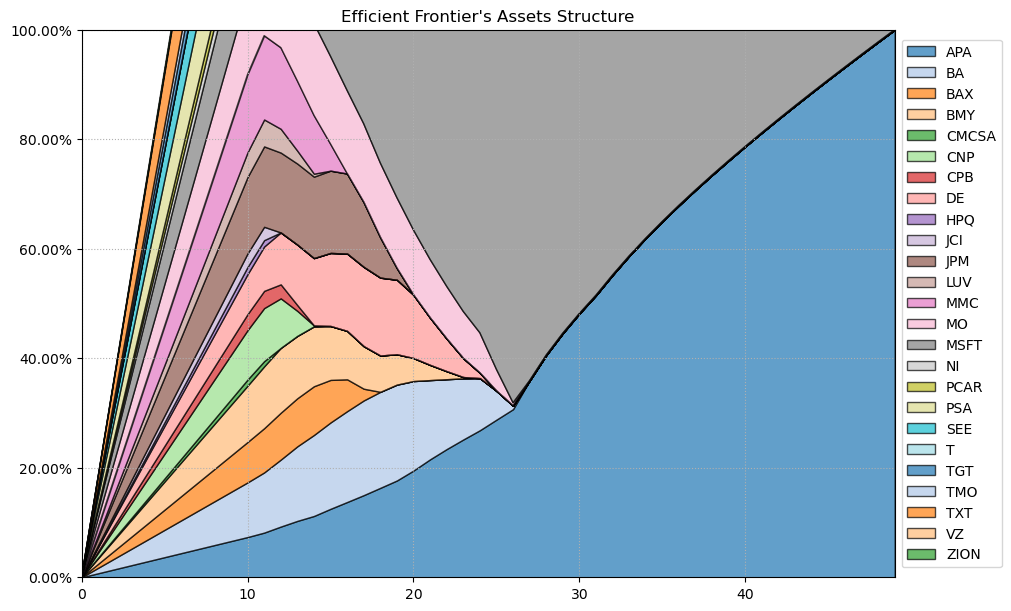

In [8]:
# Plotting efficient frontier composition in absolute values

ax = rp.plot_frontier_area(w_frontier=np.abs(frontier), cmap="tab20", height=6, width=10, ax=None)

## 4. Dollar Neutral Portfolio with a Constraint on CVaR

### 4.1 Calculating Dollar Neutral Portfolio

In [9]:
rm = 'CVaR' # Risk measure
port.upperCVaR = 0.40/252**0.5 # Creating an upper bound for daily CVaR

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

print("Sum weights : ", np.round(np.sum(w.to_numpy()),4))
display(w.T)

Sum weights :  -0.0


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,-20.6172%,9.9630%,0.0000%,-0.0000%,0.0000%,0.0000%,-0.0000%,12.1421%,0.0000%,-0.0000%,...,-0.0000%,0.0000%,-37.1882%,-21.6182%,-0.0000%,0.0000%,0.0000%,-13.6084%,-0.0000%,0.0000%


### 4.2 Plotting portfolio composition

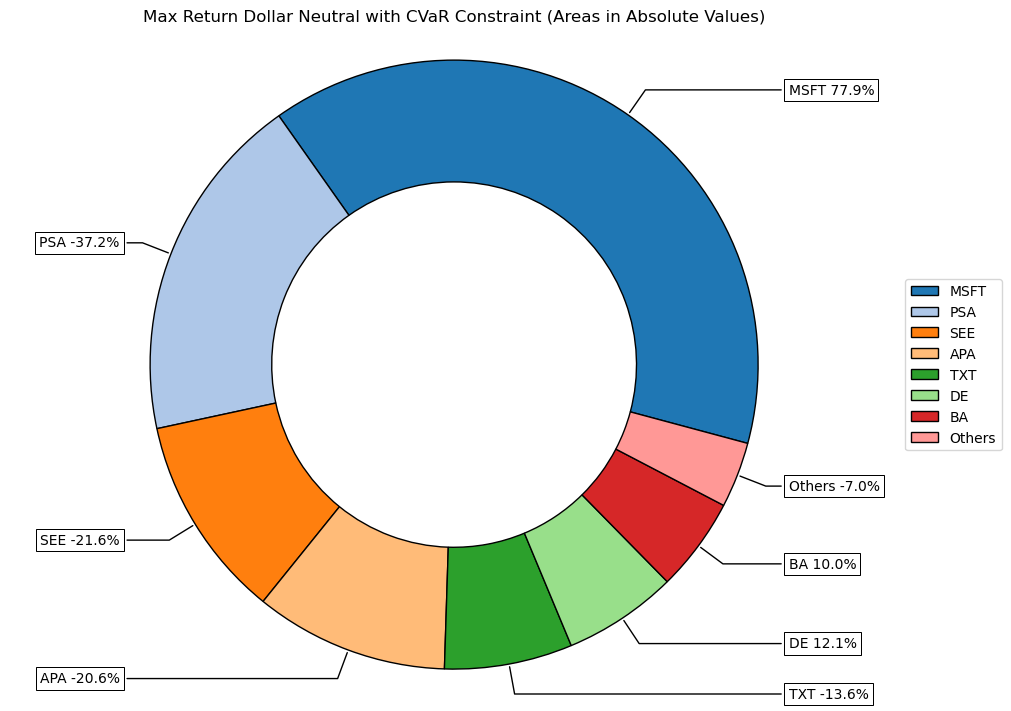

In [10]:
# Plotting the composition of the portfolio

title = "Max Return Dollar Neutral with CVaR Constraint"
ax = rp.plot_pie(w=w,
                 title=title,
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=7,
                 width=10,
                 ax=None)

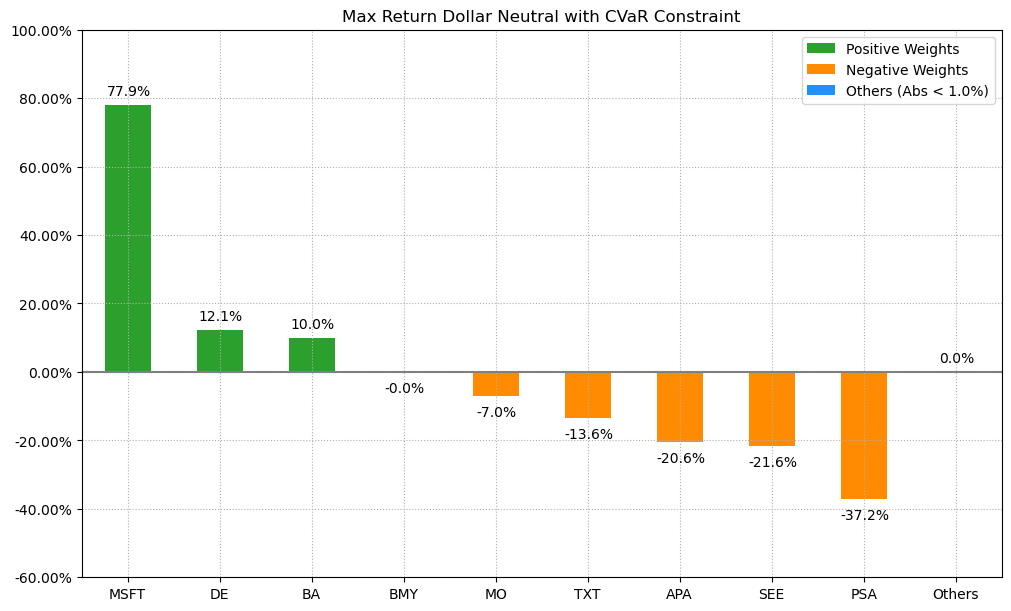

In [11]:
# Plotting the composition of the portfolio using bar chart

ax = rp.plot_bar(w,
                 title="Max Return Dollar Neutral with CVaR Constraint",
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10)

### 4.3 Calculate efficient frontier

In [12]:
points = 50 # Number of points of the frontier
port.upperCVaR = None # Deleting the upper bound for daily CVaR

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,-0.0000%,0.0000%,0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%,0.0000%,-0.0000%,-0.0000%,...,0.0000%,0.0000%,-0.0000%,-0.0000%,0.0000%,0.0000%,0.0000%,-0.0000%,-0.0000%,-0.0000%
1,-0.8005%,0.9881%,0.6532%,-2.2333%,-0.8300%,2.2411%,0.0745%,1.2035%,-0.4372%,-0.7076%,...,0.3499%,-0.1790%,-2.0114%,-1.5552%,0.9032%,0.9221%,1.7082%,-2.4100%,-0.2576%,0.4699%
2,-1.6010%,1.9762%,1.3065%,-4.4665%,-1.6600%,4.4822%,0.1490%,2.4069%,-0.8744%,-1.4151%,...,0.6999%,-0.3579%,-4.0228%,-3.1104%,1.8064%,1.8442%,3.4165%,-4.8200%,-0.5151%,0.9397%
3,-2.4016%,2.9643%,1.9597%,-6.6998%,-2.4901%,6.7233%,0.2235%,3.6104%,-1.3116%,-2.1227%,...,1.0498%,-0.5369%,-6.0342%,-4.6656%,2.7096%,2.7662%,5.1247%,-7.2301%,-0.7727%,1.4096%
4,-3.2021%,3.9523%,2.6130%,-8.9331%,-3.3201%,8.9644%,0.2980%,4.8138%,-1.7489%,-2.8303%,...,1.3997%,-0.7158%,-8.0456%,-6.2208%,3.6129%,3.6883%,6.8329%,-9.6401%,-1.0302%,1.8795%


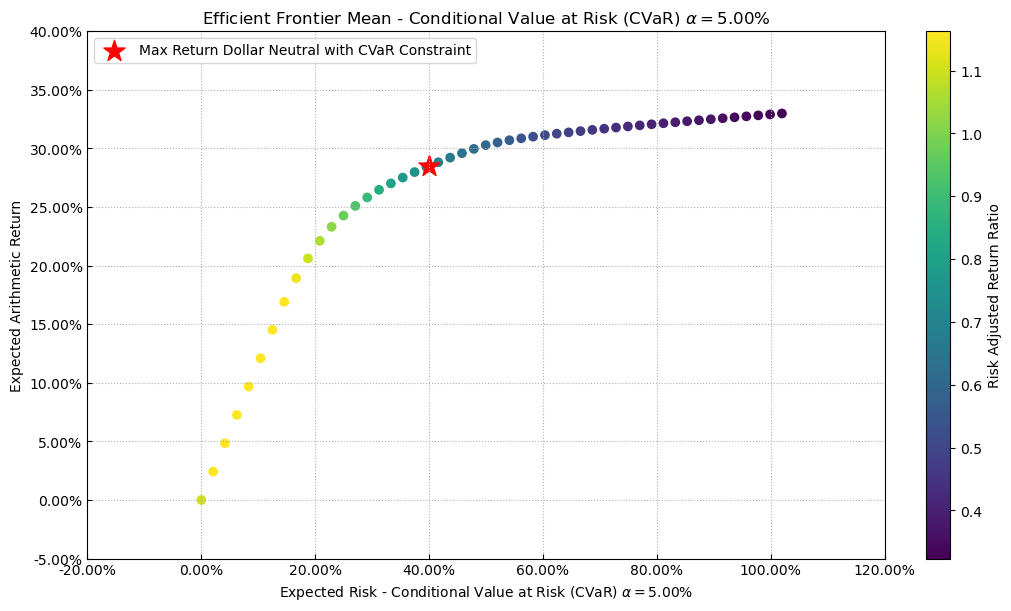

In [13]:
label = "Max Return Dollar Neutral with CVaR Constraint" # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

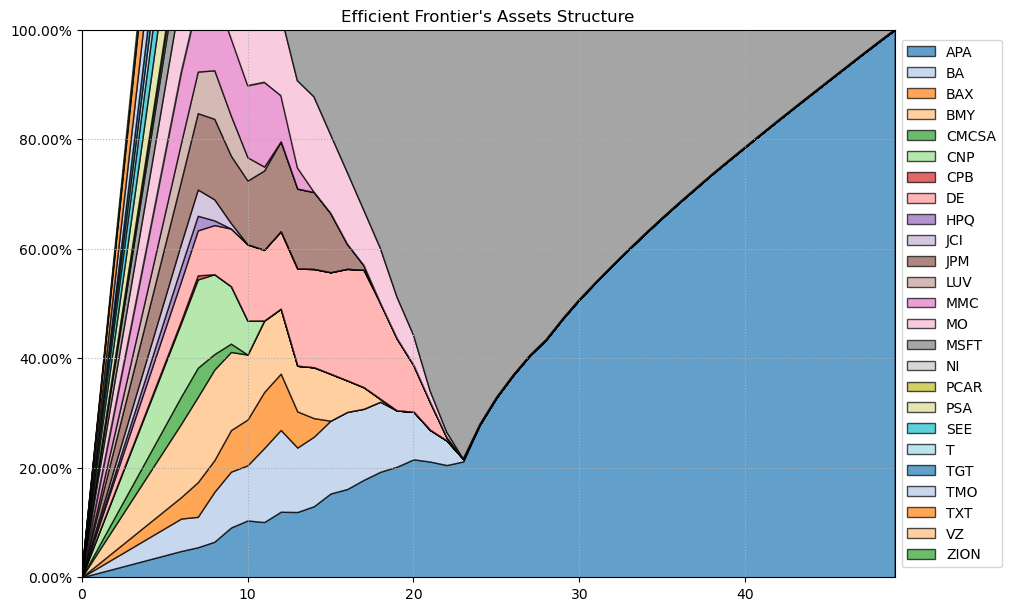

In [14]:
# Plotting efficient frontier composition in absolute values

ax = rp.plot_frontier_area(w_frontier=np.abs(frontier), cmap="tab20", height=6, width=10, ax=None)